## Python statistics essential training - 05_03_fitgoodness

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

In [8]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Setting up model plot

In [9]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Three models from last video

In [10]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [11]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [12]:
surviving_byregion_population = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving'
            '+ age5_surviving:region - age5_surviving + population',
    data=gdata).fit()

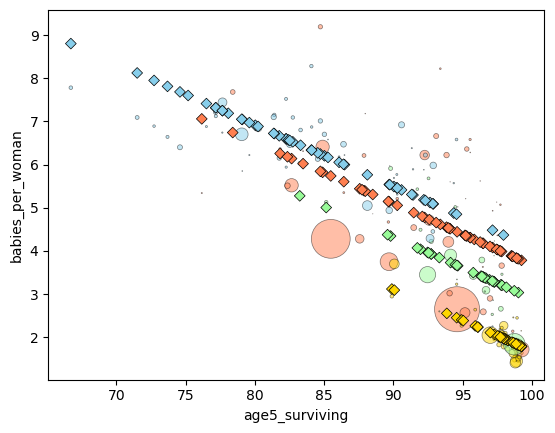

In [13]:
plotfit(surviving)

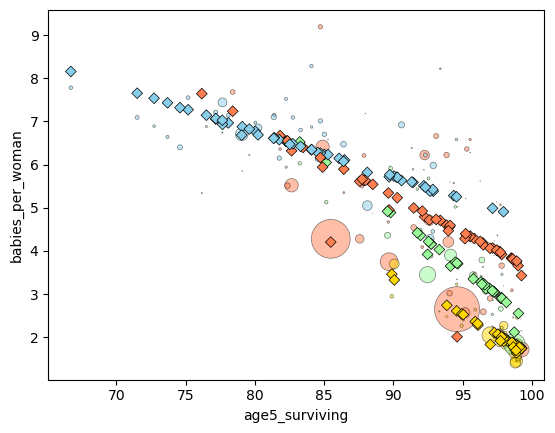

In [14]:
plotfit(surviving_byregion_population)

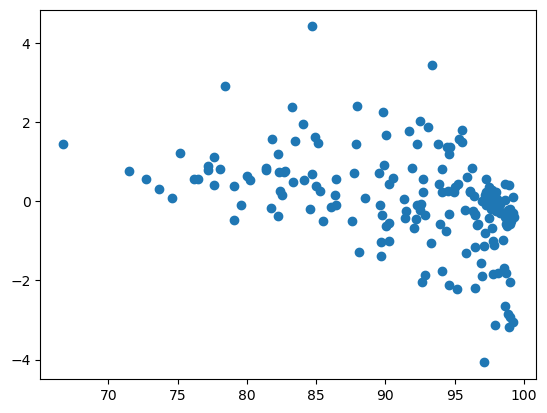

In [15]:
pp.scatter(gdata.age5_surviving,groupmeans.resid)

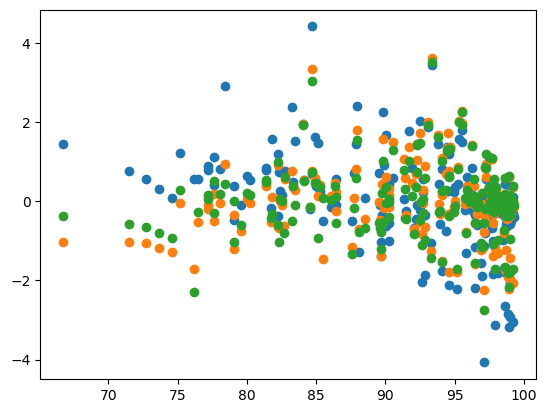

In [16]:
pp.scatter(gdata.age5_surviving,groupmeans.resid)
pp.scatter(gdata.age5_surviving,surviving.resid)
pp.scatter(gdata.age5_surviving,surviving_byregion_population.resid)

In [17]:
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.mse_resid)

1.4979520263709154
0.9423025333008324
0.8480227300570317


In [18]:
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.rsquared)

0.636467696559659
0.7726009080146058
0.7999775707885218


In [19]:
for model in [groupmeans,surviving,surviving_byregion_population]:
    print(model.fvalue)

103.88003937611687
150.34180603430977
86.48787556725195


In [20]:
surviving.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       babies_per_woman   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           8.26e-56
Time:                        23:25:22   Log-Likelihood:                -250.30
No. Observations:                 182   AIC:                             510.6
Df Residuals:                     177   BIC:                             526.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
region[Africa]     18.2658      1.168     15.639      0.000      15.961      20.571
region[America]    17.0859      1.315     12.990      0.000      14.490      19.682
region[Asia]       17.8647      1.279     13.971      0.000      15.341      20.388
region[Europe]     15.8722      1.352     11.739      0.000      13.204      18.541
age5_surviving     -0.1419      0.014    -10.294      0.000      -0.169      -0.115
==============================================================================
Omnibus:                       13.021   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.362
Skew:                           0.443   Prob(JB):                     0.000103
Kurtosis:                       4.279   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,655.512121,2.604302e-105
Residual,178.0,266.635461,1.497952,NaN,NaN


In [22]:
sm.stats.anova_lm(groupmeans)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1042.049316,8.236854e-122
age5_surviving,1.0,99.847912,99.847912,105.961630,9.003514e-20
Residual,177.0,166.787548,0.942303,NaN,NaN


In [23]:
sm.stats.anova_lm(surviving_byregion_population)

,df,sum_sq,mean_sq,F,PR(>F)
region,4.0,3927.702839,981.925710,1157.900225,1.132132e-123
age5_surviving:region,4.0,110.113541,27.528385,32.461848,3.514845e-20
population,1.0,9.813987,9.813987,11.572788,8.313090e-04
Residual,173.0,146.707932,0.848023,NaN,NaN
